In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
from tensorflow.keras import layers

In [4]:
from tensorflow.keras.models import Sequential, Model

In [5]:
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Train:", "x=", x_train.shape, "y=", y_train.shape)
print("Test:", "x=", x_test.shape, "y=", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Train: x= (60000, 28, 28) y= (60000,)
Test: x= (10000, 28, 28) y= (10000,)


In [7]:
x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.

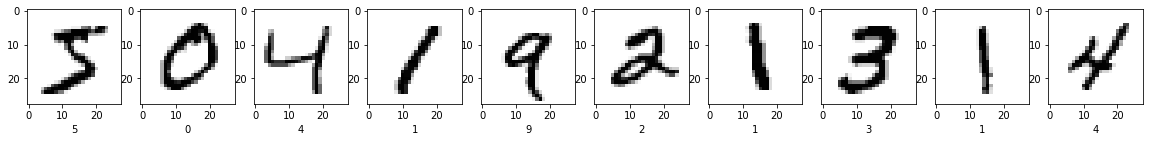

In [8]:
plt.figure(figsize = (20, 2))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[i], cmap='binary')
  #plt.xticks([])
  #plt.yticks([])
  plt.xlabel(y_train[i])

In [9]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [10]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [16]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 10, 
                    validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 1.5334 - accuracy: 0.9321 - val_loss: 1.4851 - val_accuracy: 0.9779
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 1.4849 - accuracy: 0.9765 - val_loss: 1.4777 - val_accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 1.4785 - accuracy: 0.9832 - val_loss: 1.4793 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 1.4758 - accuracy: 0.9857 - val_loss: 1.4745 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 1.4740 - accuracy: 0.9876 - val_loss: 1.4749 - val_accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 1.4719 - accuracy: 0.9895 - val_loss: 1.4733 - val_accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 1.4718 - accuracy: 0.9895 - val_loss: 1.4736 -

In [17]:
# Saving Trained model

model.save('my_model.digits.h5')
print('Saved model to disk')

Saved model to disk


In [18]:
# Saving model

In [19]:
from tensorflow.keras.models import load_model

model = load_model('my_model.digits.h5')

In [20]:
# Make a prediction for a new image 

In [21]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [22]:
# Load and prepare the image

In [32]:
def load_image(filename):
  img = load_img(filename, grayscale = True, target_size = (28, 28))
  img = img_to_array(img)
  img = img.reshape(1, 28, 28, 1)
  img = img.astype('float32')
  img = img / 255.0
  return img


In [34]:
# Load an image and predict the class

def predict_sample():
  img = load_image('apple.jpg')
  model = load_model('my_model.digits.h5')
  digit = model.predict_classes(img)
  print(digit[0])

predict_sample()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


3


In [35]:
# Evaluate the model

313/313 - 3s - loss: 1.4717 - accuracy: 0.0996


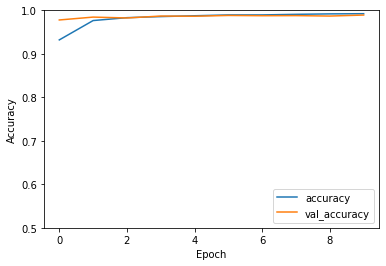

In [36]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)

In [37]:
print(test_acc)

0.09960000216960907
